Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


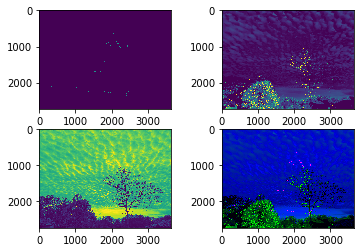

In [5]:
# RGB转HSV

import cv2
import numpy as np
import matplotlib.pyplot as plt

def rgb2hsv(img):
    h = img.shape[0]
    w = img.shape[1]
    H = np.zeros((h,w),np.float32)
    S = np.zeros((h, w), np.float32)
    V = np.zeros((h, w), np.float32)
    r,g,b = cv2.split(img)
    r, g, b = r/255.0, g/255.0, b/255.0
    for i in range(0, h):
        for j in range(0, w):
            mx = max((b[i, j], g[i, j], r[i, j]))
            mn = min((b[i, j], g[i, j], r[i, j]))
            V[i, j] = mx
            if V[i, j] == 0:
                S[i, j] = 0
            else:
                S[i, j] = (V[i, j] - mn) / V[i, j]
            if mx == mn:
                H[i, j] = 0
            elif V[i, j] == r[i, j]:
                if g[i, j] >= b[i, j]:
                    H[i, j] = (60 * ((g[i, j]) - b[i, j]) / (V[i, j] - mn))
                else:
                    H[i, j] = (60 * ((g[i, j]) - b[i, j]) / (V[i, j] - mn))+360
            elif V[i, j] == g[i, j]:
                H[i, j] = 60 * ((b[i, j]) - r[i, j]) / (V[i, j] - mn) + 120
            elif V[i, j] == b[i, j]:
                H[i, j] = 60 * ((r[i, j]) - g[i, j]) / (V[i, j] - mn) + 240
            H[i,j] = H[i,j] / 2
    return H, S, V

img = cv2.imread('./picture.jpg')
h,s,v = rgb2hsv(img)

plt.subplot(2,2,1)
plt.imshow(h)
plt.subplot(2,2,2)
plt.imshow(s)
plt.subplot(2,2,3)
plt.imshow(v)
# plt.imshow(dst)
# cv2.imshow("h",h)
# cv2.imshow("s",s)
# cv2.imshow("v",v)
merged = cv2.merge([h,s,v]) #前面分离出来的三个通道
plt.subplot(2,2,4)
plt.imshow(merged)
# cv2.imshow("hsv",merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
